# Projeto	3:	Seleção	e	transformação	de	atributos,	avaliação	de	classificadores

### Giovanna Zolin Pinheiro Hayasida - no 9762848 
### Luna Wagner Cunha - no 9762831

1	- Considere	a	base	dados	gerado	pela	função	skdata.make_circles (noise	=	0.2),	conforme	feito	em	aula. Compare	os	seguintes	algoritmos:	(a)	Redes	Neurais,	(b)	Naive	Bayes,	(c)	Knn,	(d)	Random	forest.	
Use	as	métricas	Accuracy,	F1,	Precision,	Recall. Use o	método	k-fold	cross	validation	com	k=10.


In [1]:
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# generate 2d classification dataset
n_samples = 300
X, y = skdata.make_circles(n_samples=n_samples, factor=.5,noise=0.2)

d = np.column_stack((X,np.transpose(y)))
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels= np.unique(y)
classes = class_labels
#Plotting
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

ImportError: cannot import name 'datasets'

In [11]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
import pandas as pd
k = 10
kf = KFold(n_splits=k)
score_0,score_1,score_2,score_3,score_4 = [],[],[],[],[]
vprecision0,vprecision1,vprecision2,vprecision3,vprecision4 = [],[],[],[],[]
f0,f1,f2,f3,f4 = [],[],[],[],[]
recall0,recall1,recall2,recall3,recall4 = [],[],[],[],[]
def clas(X,y):
    for train_index, test_index in kf.split(X,y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #Random Forest
        clf = RandomForestClassifier(random_state=0)
        clf.fit(x_train, y_train)
        y_pred_0 = clf.predict(x_test)
        
        score_0.append(accuracy_score(y_pred_0 , y_test))
        vprecision0.append(precision_score(y_pred_0, y_test))
        f0.append(f1_score(y_test, y_pred_0, average="macro"))
        recall0.append(recall_score(y_test,y_pred_0,  average="macro"))
        
        ##KNN
        k = 1
        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        # Train the model using the training sets
        model.fit(x_train,y_train)
        #Predict Output
        pred_y_1= model.predict(x_test) 
        
        score_1.append(accuracy_score(pred_y_1, y_test)) 
        vprecision1.append(precision_score(pred_y_1, y_test))
        f1.append(f1_score(y_test,pred_y_1, average="macro"))
        recall1.append(recall_score(y_test,pred_y_1,  average="macro"))
        
      
        ##NB
        gnb = GaussianNB()
        gnb.fit(x_train,y_train)
        pred_y_3= gnb.predict(x_test)
        
        score_3.append(accuracy_score(pred_y_3, y_test))
        vprecision3.append(precision_score(pred_y_3, y_test))
        f3.append(f1_score(y_test,pred_y_3, average="macro"))
        recall3.append(recall_score(y_test,pred_y_3,  average="macro"))
        #Redes neurais - MLP
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, ), random_state=1)# Train the model on training data
        clf.fit(x_train, y_train);
        pred_y_4 = clf.predict(x_test)
        
        score_4.append(accuracy_score(pred_y_4, y_test))
        vprecision4.append(precision_score(pred_y_4, y_test))
        f4.append(f1_score(y_test,pred_y_4, average="macro"))
        recall4.append(recall_score(y_test,pred_y_4,  average="macro"))
        return score_0,score_1, score_3,score_4, vprecision0, vprecision1,vprecision3,vprecision4, f0,f1,f3,f4,recall0, recall1,recall3,recall4

score_0,score_1, score_3,score_4, vprecision0, vprecision1,vprecision3,vprecision4, f0,f1,f3,f4,recall0, recall1,recall3,recall4 = clas(X,y)
from prettytable import PrettyTable
t = PrettyTable(['Metodos', 'Acuracia','Precisao', 'F1','Recall'])
t.add_row(['Random forest', np.mean(score_0), np.mean(vprecision0), np.mean(f0), np.mean(recall0)])
t.add_row(['Knn', np.mean(score_1), np.mean(vprecision1), np.mean(f1), np.mean(recall1)])
t.add_row(['Naive Bayes', np.mean(score_3), np.mean(vprecision3), np.mean(f3), np.mean(recall3)])
t.add_row(['Redes Neurais', np.mean(score_4), np.mean(vprecision4), np.mean(f4), np.mean(recall4)])
print(t)



+---------------+--------------------+--------------------+--------------------+--------------------+
|    Metodos    |      Acuracia      |      Precisao      |         F1         |       Recall       |
+---------------+--------------------+--------------------+--------------------+--------------------+
| Random forest | 0.8333333333333334 | 0.7647058823529411 | 0.8331479421579533 | 0.8438914027149321 |
|      Knn      | 0.8666666666666667 | 0.8823529411764706 | 0.8642533936651584 | 0.8642533936651584 |
|  Naive Bayes  |        0.8         | 0.7647058823529411 | 0.7991071428571428 | 0.8054298642533937 |
| Redes Neurais |        0.8         | 0.7647058823529411 | 0.7991071428571428 | 0.8054298642533937 |
+---------------+--------------------+--------------------+--------------------+--------------------+


Considere a	partir	de	agora a	base	de	dados	sobre	diabetes: https://www.kaggle.com/uciml/pima-indians-diabetes-database


In [3]:
#Carregando os dados 
import random
random.seed(1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV file

data = pd.read_csv('diabetes.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
classes = pd.unique(data[data.columns[-1]]) 
classes = np.array(classes, dtype=str) 

print(data.shape)
list_labels = list(data.columns)
data.head(10)

 
y = np.array(data[list_labels[-1]])#,dtype=str

data= data.drop(list_labels[-1], axis = 1)

# Saving feature names for later use
variables = list(data.columns)

# Convert to numpy array
X = np.array(data)

(768, 9)


2	- Verifique	como a	classifição	muda	quando	consideramos	o	método k-fold	cross	validation.	Ou	seja,	faça	um	gráfico	da	medida	Precison	em	função	de	k	para	os	algoritmos	Redes	Neurais	e	Random	Forest.

D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\f

D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\f

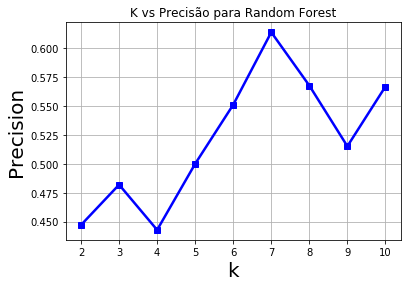

In [8]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#### PARA RANDOM FOREST
vprecision = []

for k in np.arange(2,11,1):
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X,y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = RandomForestClassifier()
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
    #print('Accuracy:', accuracy_score(y_pred, y_test))
    vprecision.append(precision_score(y_pred, y_test))

k = np.arange(2,11,1)        
#Plotando os resultados gerados de acurácia e K's.
plt.plot(k, vprecision, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.title("K vs Precisão para Random Forest")
plt.xlabel("k", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.grid(True)
plt.show(True)

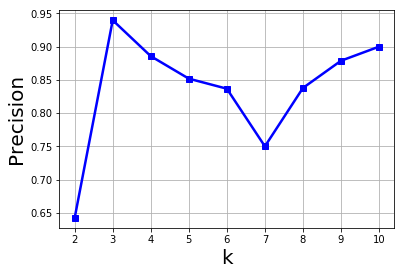

In [6]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler  
vprecision = []
layers = (10,)
for k in np.arange(2,11,1):
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X,y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        scaler = MinMaxScaler()  
        scaler.fit(x_train)  
        train_x = scaler.transform(x_train)  
        test_x = scaler.transform(x_test)  
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=layers, random_state=1)
        clf.fit(train_x, y_train)
        y_pred = clf.predict(x_test)
    vprecision.append(precision_score(y_pred, y_test))

k = np.arange(2,11,1)        
#Plotando os resultados gerados de acurácia e K's.
plt.plot(k, vprecision, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("k", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.grid(True)
plt.show(True)


3	- Compare	os classificadores	Redes	Neurais,	Naïve	Bayes	e Random	Forest	para k=10	(k-fold	cross	validation estratificado)	em	termos	da	curva	ROC. Qual classificador	é	o	melhor?	Justifique.

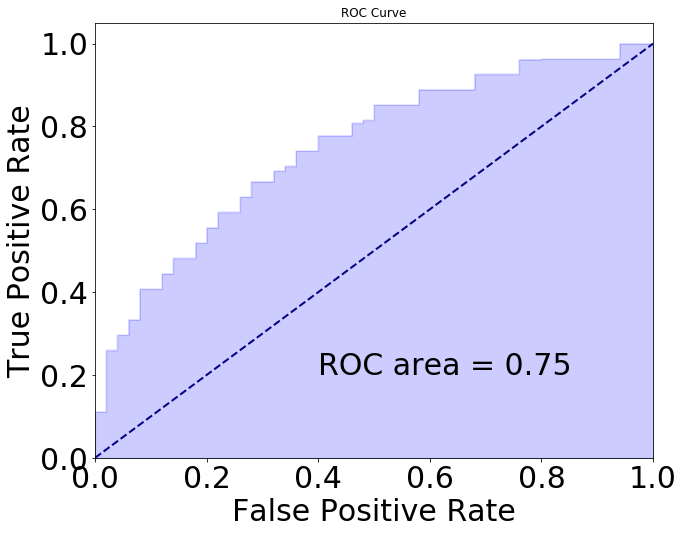

In [72]:
#Redes neurais
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler  
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
vprecision = []
roc_auc1 = []
f=[]
t=[]
for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = MinMaxScaler()  
    scaler.fit(x_train)  
    train_x = scaler.transform(x_train)  
    test_x = scaler.transform(x_test)  
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=layers, random_state=1)
    clf.fit(x_train, y_train)
    y_predict_probabilities1 = clf.predict_proba(x_test)[:,1]
    test_y1 = np.array(y_test, dtype = 'int')
    fpr1, tpr1, thresholds1 = roc_curve(test_y1, y_predict_probabilities1)
    f.extend(fpr1)
    t.extend(tpr1)
#    if (roc_auc_random < auc(fpr1, tpr1)):
#        roc_auc_random = auc(fpr, tpr)
#        fpr_random, tpr_random, thresholds = roc_curve(y_test, y_predict_probabilities)

f= sorted(f)
t = sorted(t)
roc_auc1 = auc(f,t)
plt.figure(figsize=(10,8))
plt.step(f, t, color='b', alpha=0.1, where='post')
plt.fill_between(f, t, step='post', alpha=0.2, color='b')
plt.text(0.4, 0.2, 'ROC area = %0.2f' % roc_auc1, fontsize = 30)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate', fontsize = 30)
plt.xticks(color='k', size=30)
plt.yticks(color='k', size=30)
plt.title('ROC Curve')

plt.show()

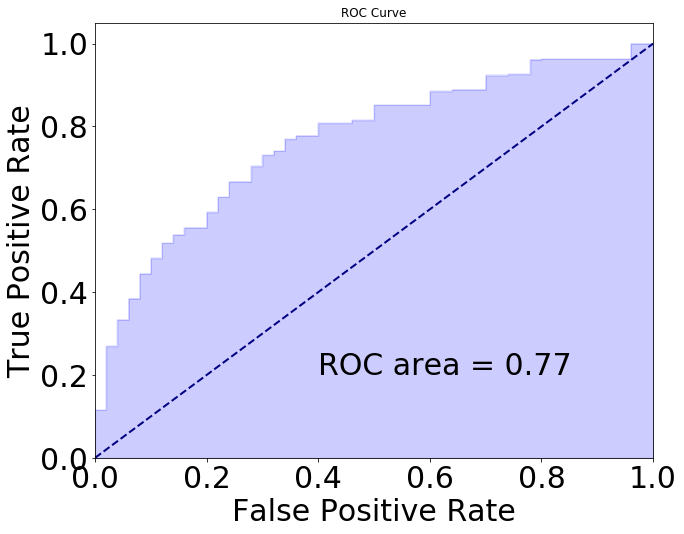

In [73]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
vprecision = []
roc_auc2 =[]
f1=[]
t1=[]
for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = GaussianNB()
    gnb.fit(x_train,y_train)
    y_predict_probabilities2 = clf.predict_proba(x_test)[:,1]
    test_y2 = np.array(y_test, dtype = 'int')
    fpr2, tpr2, thresholds2 = roc_curve(test_y2, y_predict_probabilities2)
    f1.extend(fpr2)
    t1.extend(tpr2)

f1 = sorted(f1)
t1=sorted(t1)
roc_auc2 =auc(f1,t1)
    
plt.figure(figsize=(10,8))
plt.step(f1, t1, color='b', alpha=0.1, where='post')
plt.fill_between(f1, t1, step='post', alpha=0.2, color='b')
plt.text(0.4, 0.2, 'ROC area = %0.2f' % roc_auc2, fontsize = 30)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate', fontsize = 30)
plt.xticks(color='k', size=30)
plt.yticks(color='k', size=30)
plt.title('ROC Curve')

plt.show()

D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\f

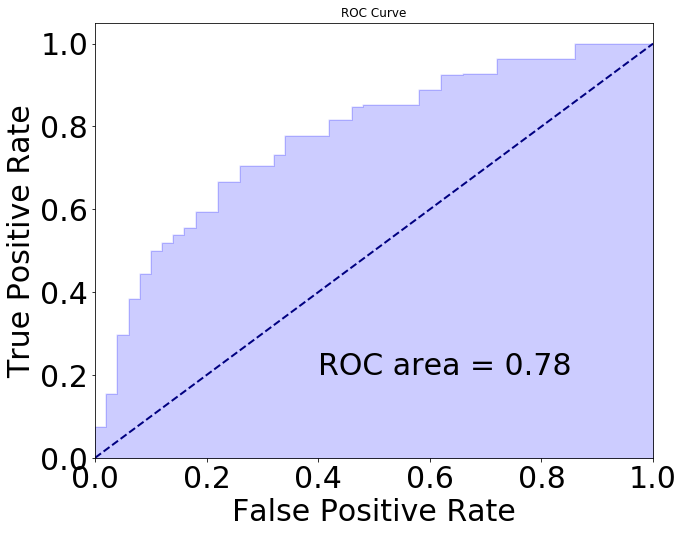

In [74]:
#Random Forest
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
vprecision = []
roc_auc = []
f2 = []
t2 = []

for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #Random forest
    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)
    y_predict_probabilities = clf.predict_proba(x_test)[:,1]
    test_y = np.array(y_test, dtype = 'int')
    fpr, tpr, thresholds = roc_curve(test_y, y_predict_probabilities)
    f2.extend(fpr)
    t2.extend(tpr)

f2 = sorted(f2)
t2 = sorted(t2)
roc_auc = auc(f2,t2)  
plt.figure(figsize=(10,8))
plt.step(f2, t2, color='b', alpha=0.1, where='post')
plt.fill_between(f2, t2, step='post', alpha=0.2, color='b')
#plt.plot(fpr, tpr, 'b-',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.text(0.4, 0.2, 'ROC area = %0.2f' % roc_auc, fontsize = 30)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate', fontsize = 30)
plt.xticks(color='k', size=30)
plt.yticks(color='k', size=30)
plt.title('ROC Curve')
#plt.savefig('ROC.pdf')

plt.show()

In [24]:
print('Área média sob a curva ROC usando RN:', roc_auc1)
print('Área média sob a curva usando NB:', roc_auc2)
print('Área média sob a curva usando RF:', roc_auc)

Área média sob a curva ROC usando RN: 0.7556752136752136
Área média sob a curva usando NB: 0.7736894586894587
Área média sob a curva usando RF: 0.7901965811965812


4 – Usando	o	método	que	seleciona	apenas	um	atributo	por	vez	(univariado, teste	qui-quadrado),	faça	uma	curva	da	medida	F1	em	função	do	número	de	atributos	considerados.	Isto	é,	obtenha	F1 para	o	atributo	mais	importante,	depois	para	os	dois	mais	importantes	e	assim	por	diante.

In [36]:

# CSV file

data = pd.read_csv('diabetes.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
classes = pd.unique(data[data.columns[-1]]) 
classes = np.array(classes, dtype=str) 

print(data.shape)
list_labels = list(data.columns)
data.head(10)

 
y = np.array(data[list_labels[-1]])#,dtype=str

data= data.drop(list_labels[-1], axis = 1)

# Saving feature names for later use
variables = list(data.columns)

# Convert to numpy array
X = np.array(data)

(768, 9)


D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\f

D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\f

D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


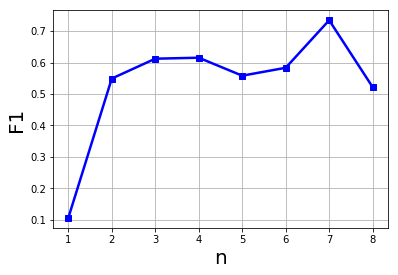

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.7
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 1-p, random_state = 42)

f1 = []

for n in np.arange(1,9,1):
    test = SelectKBest(score_func=chi2, k=n)
    fit = test.fit(X, y)
    features=fit.transform(X)
    for train_index, test_index in cv.split(features, y):
        x_train, x_test = features[train_index], features[test_index]
        y_train, y_test = y[train_index], y[test_index]
    #Random forest
        clf = RandomForestClassifier()
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
    f1.append(np.mean(f1_score(y_pred, y_test)))
    
n = np.arange(1,9,1)        
#Plotando os resultados gerados de acurácia e K's.
plt.plot(n, f1, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("n", fontsize=20)
plt.ylabel("F1", fontsize=20)
plt.grid(True)
plt.show(True)

Podemos ver que com 2 atributos, a F1 mostra um melhor desempenho.

5 – Projete	os	dados	usando	PCA	e	faça	um	gráfico	de	F1	em	termos	do	número	de	components.	Quantos	components	oferecem	a	maior	taxa	de	acerto?	Compare	com	a	curva	“cumulative	explained	variance”	versus	“number	of	components”	e explique	os	resultados.

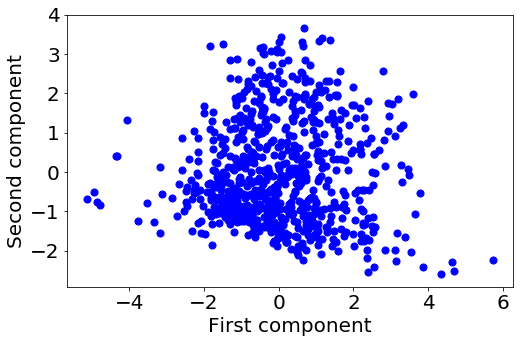

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
plt.figure(figsize=(8,5))
plt.scatter(pca_result[:,0], pca_result[:,1], s=50, color = 'blue')
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

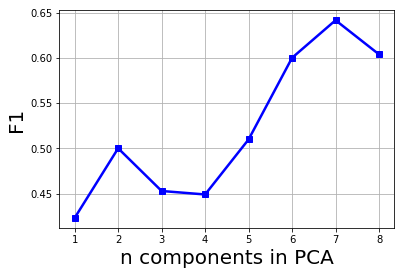

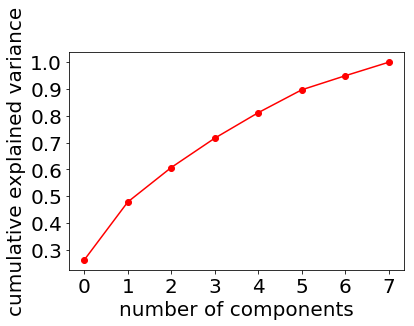

In [23]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
f1 = []
for n in np.arange(1,9,1):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    k = 10
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X_pca,y):
        x_train, x_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = RandomForestClassifier()
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
    
    f1.append(f1_score(y_pred, y_test))

n = np.arange(1,9,1)        
#Plotando os resultados gerados de acurácia e K's.
plt.plot(n,f1, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("n components in PCA", fontsize=20)
plt.ylabel("F1", fontsize=20)
plt.grid(True)
plt.show(True)

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)


6 – Considere agora a	base	de	dados	do	Titanic,	conforme	descrita	em:
https://www.kaggle.com/c/titanic/data
Construa	a	curva	ROC	para	as	redes	neurais	e	random	forest.
Identifique	os	atributos	mais	importantes	usando	o	método	wrapper.	
Construa um	gráfico	da	medida	Precision	em	função	do	número	de	atributos	usados.	É possível	melhorar	a classificação	considerando	um	número	reduzido	de	atributos?

In [85]:
#Carregando os dados 
import random
random.seed(1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV file

data = pd.read_csv('train.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
classes = pd.unique(data[data.columns[1]]) 
classes = np.array(classes)#, dtype=str 
list_labels = list(data.columns)
y = np.array(data[list_labels[1]])
#data = data.drop(data.columns[[0,1,3,8,9,10]],axis=1)
print(data.shape)
list_labels = list(data.columns)
data.head(10)



(183, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [86]:
data.Sex[data.Sex == 'male'] = 1
data.Sex[data.Sex == 'female'] = 0
data.Embarked[data.Embarked == 'C'] = 1
data.Embarked[data.Embarked == 'S'] = 2
data.Embarked[data.Embarked == 'Q'] = 3

D:\Users\Luna\Downloads\ANA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Users\Luna\Downloads\ANA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Users\Luna\Downloads\ANA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [87]:
X = data.drop(data.columns[[0,1,3,8,10]],axis=1)
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,1
3,1,0,35.0,1,0,53.1000,2
6,1,1,54.0,0,0,51.8625,2
10,3,0,4.0,1,1,16.7000,2
11,1,0,58.0,0,0,26.5500,2
21,2,1,34.0,0,0,13.0000,2
23,1,1,28.0,0,0,35.5000,2
27,1,1,19.0,3,2,263.0000,2
52,1,0,49.0,1,0,76.7292,1
54,1,1,65.0,0,1,61.9792,1


In [88]:
y

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [89]:
X = np.array(X,dtype=float)#,dtype=float


In [96]:
#X = X.replace('female', 0)

D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\f

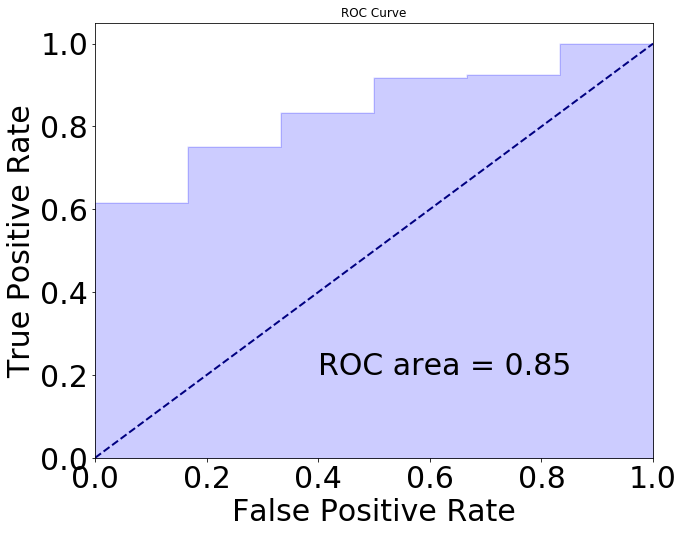

In [90]:
#Random Forest
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
vprecision = []
f3 = []
t3 = []

for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #Random forest
    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)
    y_predict_probabilities = clf.predict_proba(x_test)[:,1]
    test_y = np.array(y_test)#, dtype = 'int'
    fpr, tpr, thresholds = roc_curve(test_y, y_predict_probabilities)
    f3.extend(fpr)
    t3.extend(tpr)

f3 = sorted(f3)
t3 = sorted(t3)
roc_auc3 = auc(f3,t3)
plt.figure(figsize=(10,8))
plt.step(f3, t3, color='b', alpha=0.1, where='post')
plt.fill_between(f3, t3, step='post', alpha=0.2, color='b')
#plt.plot(fpr, tpr, 'b-',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.text(0.4, 0.2, 'ROC area = %0.2f' % roc_auc3, fontsize = 30)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate', fontsize = 30)
plt.xticks(color='k', size=30)
plt.yticks(color='k', size=30)
plt.title('ROC Curve')
#plt.savefig('ROC.pdf')

plt.show()

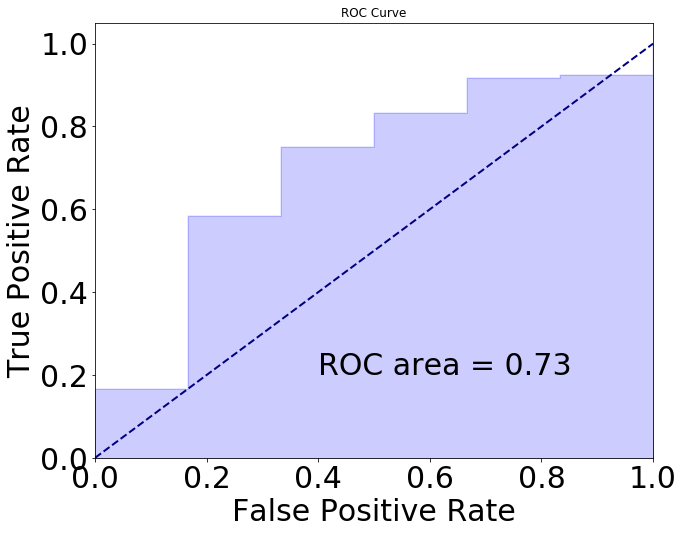

In [91]:
### Redes Neurais
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
vprecision = []
f4 = []
t4 = []

for train_index, test_index in cv.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = MinMaxScaler()  
    scaler.fit(x_train)  
    train_x = scaler.transform(x_train)  
    test_x = scaler.transform(x_test)  
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=layers, random_state=1)
    clf.fit(x_train, y_train)
    y_predict_probabilities1 = clf.predict_proba(x_test)[:,1]
    test_y1 = np.array(y_test, dtype = 'int')
    fpr4, tpr4, thresholds1 = roc_curve(test_y1, y_predict_probabilities1)
    f4.extend(fpr4)
    t4.extend(tpr4)

f4 = sorted(f4)
t4 = sorted(t4)
roc_auc4 = auc(f4,t4)
plt.figure(figsize=(10,8))
plt.step(f4, t4, color='b', alpha=0.1, where='post')
plt.fill_between(f4, t4, step='post', alpha=0.2, color='b')
#plt.plot(fpr, tpr, 'b-',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.text(0.4, 0.2, 'ROC area = %0.2f' % roc_auc4, fontsize = 30)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate', fontsize = 30)
plt.xticks(color='k', size=30)
plt.yticks(color='k', size=30)
plt.title('ROC Curve')
#plt.savefig('ROC.pdf')

plt.show()

In [92]:
#Wrapper
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
nfeatures = 5
# feature extraction
model = RandomForestClassifier()
rfe = RFE(model, nfeatures)
fit = rfe.fit(X, y)
print('Num Features: ',fit.n_features_)
print('\nSelected Features: ')
f_selected = []
for f in np.arange(0, len(fit.support_)):
    if(fit.support_[f] == True):
        print(list_labels[f])
        f_selected.append(list_labels[f])
print('\nFeature ranking:')
for i in np.arange(0, len(fit.ranking_)):
    print(fit.ranking_[i],':', list_labels[i])

Num Features:  5

Selected Features: 
Survived
Pclass
Name
Sex
Age

Feature ranking:
3 : PassengerId
1 : Survived
1 : Pclass
1 : Name
1 : Sex
1 : Age
2 : SibSp


D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [93]:
f_selected

['Survived', 'Pclass', 'Name', 'Sex', 'Age']

In [101]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
f_selected=['Survived','Pclass','Sex','Age','SibSp']
XS = np.array(data[f_selected]) # new data with the selected features
# Split the data into training and testing sets

vprecision = []
for i in np.arange(2,6,1):
    XS = np.array(data[f_selected[1:i]])
    for train_index, test_index in cv.split(XS, y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = RandomForestClassifier()
        clf.fit(train_x, train_y)
        y_pred = clf.predict(test_x)
        p=precision_score(y_pred, test_y)
    vprecision.append(np.mean(p))
        


D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Users\Luna\Downloads\ANA\lib\site-packages\sklearn\ensemble\f

[1.0, 1.0, 1.0, 1.0]

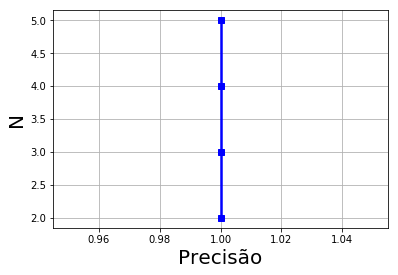

In [102]:
n = np.arange(2,6,1)        
#Plotando os resultados gerados de acurácia e K's.
plt.plot(vprecision,n, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("Precisão", fontsize=20)
plt.ylabel("N", fontsize=20)
plt.grid(True)
plt.show(True)